# Paardenvechters Draft

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')

studenten: Pepe Morselt (15239551), Marilène Oud (15247112), Paul Elsinghorst (15002608), Thimo de Wolff (15240428)

groep: M2

link to dataset3: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle
## Introductie

Diabetes is een chronische ziekte die impact heeft op miljoenen mensen. Het lichaam kan glucose niet goed reguleren, wat kan leiden tot een te hoge bloedsuikerspiegel en, indien niet behandeld, schade aan verschillende organen.

Diabetes komt in twee vormn voor: diabetes type 1 en type 2. In deze datastory richten we ons voornamelijk op type 2, omdat er verschillende correlaties kunnen worden gevonden tussen factoren zoals levensstijl, voeding en gezondheid. Deze factoren beïnvloeden het ontstaan van diabetes type 2, in tegenstelling tot diabetes type 1, dat voornamelijk genetisch bepaald is. Door te onderzoeken naar hoe fysieke activiteit en omgevingsfactoren bijdragen aan deze aandoening bij mensen met verschillende inkomens, kunnen we nagaan of er een hogere of lagere kans is op het ontstaan van diabetes type 2 bij verschillende inkomensgroepen. Met deze datastory hopen we dit probleem te belichten zodat er effectievere preventie- en behandelstrategieën ontwikkeld kunnen worden die de levenskwaliteit verbeteren voor mensen met diabetes die financieel kwetsbaar zijn.

Onze perspectieven en argumenten zijn de volgende:

Het risico op het ontwikkelen van diabetes hangt sterk samen met het inkomen van een persoon, waardoor een individu met een lager inkomen meer kans heeft om diabetes te ontwikkelen.

Arg 1: Mensen met een lager inkomen ervaren vaak een beperkte toegang tot gezonde voeding, tijd voor fysieke activiteit en gezondheidszorg.

Arg 2: Mensen met een lager inkomen wonen in buurten met minder supermarkten die verse, niet bewerkte producten aanbieden en meer fastfoodrestaurants.

Arg 3: Goedkope etenswaren zijn vaak ongezond.

Het risico op diabets is niet uitsluitend afhankelijk van inkomen, maar van de beslissingen die individuen zelf nemen.


## Dataset en Preprocessing


In [2]:
#https://www.kaggle.com/datasets/mathchi/diabetes-data-set
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Outcome': 'diabetes'})
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
df2 = pd.read_csv("diabetes_prediction_dataset.csv")
pd.set_option('display.max_columns', None)
df2.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df3 = pd.read_csv("ss.csv")
df3['BMI Category'] = df3['BMI Category'].replace('Normal Weight', 'Normal')
df3.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


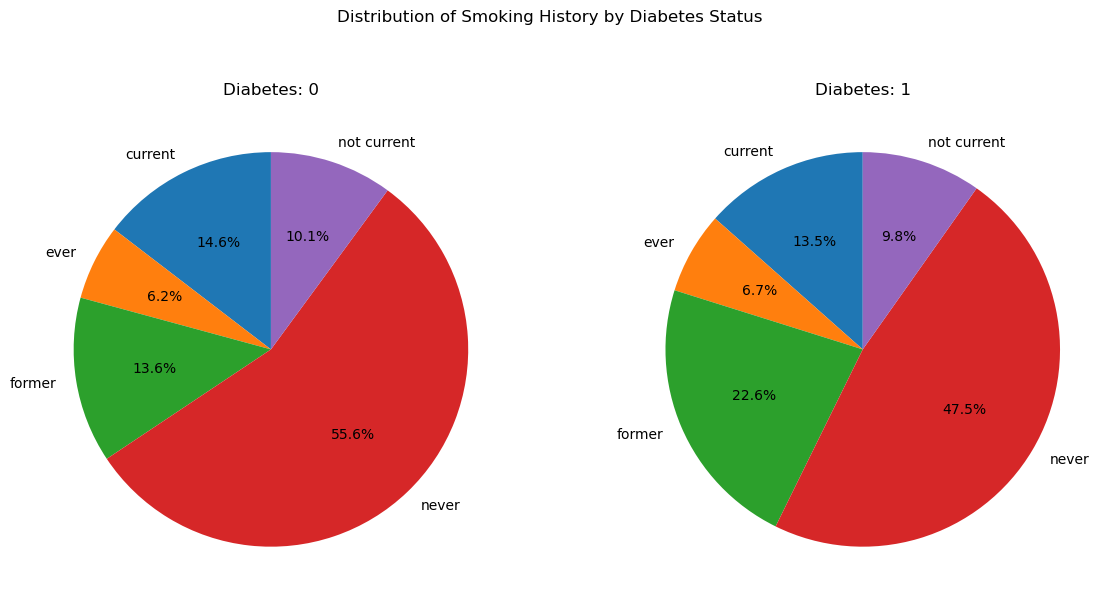

In [5]:
df2 = df2[df2['smoking_history'] != 'No Info']
diabetes_smoking_summary = df2.groupby(['diabetes', 'smoking_history']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, diabetes_category in enumerate(diabetes_smoking_summary.index):
    axes[i].pie(diabetes_smoking_summary.loc[diabetes_category],
                labels=diabetes_smoking_summary.columns,
                autopct='%1.1f%%',
                startangle=90)
    axes[i].set_title(f'Diabetes: {diabetes_category}')

plt.suptitle('Distribution of Smoking History by Diabetes Status')
plt.show()

## Observaties

Deze gegevens zijn gefilterd zodat de gegevens waarvan we hun niet in het cirkeldiagram zijn geplaatst, wat tot een verkeerde visualisatie van de gegevens kan leiden.

Mensen met diabetes hebben vaker gerookt. We hebben echter nog niet ontdekt waarom dit het geval is.

In [80]:
import plotly.express as px
import pandas as pd

diab_prev = pd.read_csv('diabetes-prevalence.csv')

diab_prev['Year'] = pd.to_numeric(diab_prev['Year'])

diab_prev_sorted = diab_prev.sort_values(by='Year')

fig = px.choropleth(diab_prev_sorted, 
                    locations='Code',
                    color='Diabetes prevalence (% of population ages 20 to 79)',  # Column with data to plot
                    hover_name='Entity',
                    animation_frame='Year',
                    color_continuous_scale='YlOrRd',
                    projection='natural earth'
                   )

fig.update_layout(title='Diabetes Prevalence Worldwide',
                  geo=dict(showcoastlines=True,
                           showcountries=True),
                  height=600,
                  width=1000
                 )

fig.show()

In [7]:
df4 = pd.read_csv("weight_20_USA.csv")
df5 = pd.read_csv("Weight_children_USA.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df4.head(1)


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN


In [8]:
df5.head(1)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,1988-1994,1,2-19 years,0.0,10.0,0.5,NaN


In [9]:
def print_column_headers(dataset):
    """
    Prints all the column headers of a pandas DataFrame.
    
    Parameters:
    dataset (pd.DataFrame): The dataset from which to print column headers.
    """
    if not isinstance(dataset, pd.DataFrame):
        raise TypeError("The input dataset must be a pandas DataFrame.")
    
    print("Column Headers:")
    for col in dataset.columns:
        print(col)
print_column_headers(df4)

Column Headers:
INDICATOR
PANEL
PANEL_NUM
UNIT
UNIT_NUM
STUB_NAME
STUB_NAME_NUM
STUB_LABEL
STUB_LABEL_NUM
YEAR
YEAR_NUM
AGE
AGE_NUM
ESTIMATE
SE
FLAG


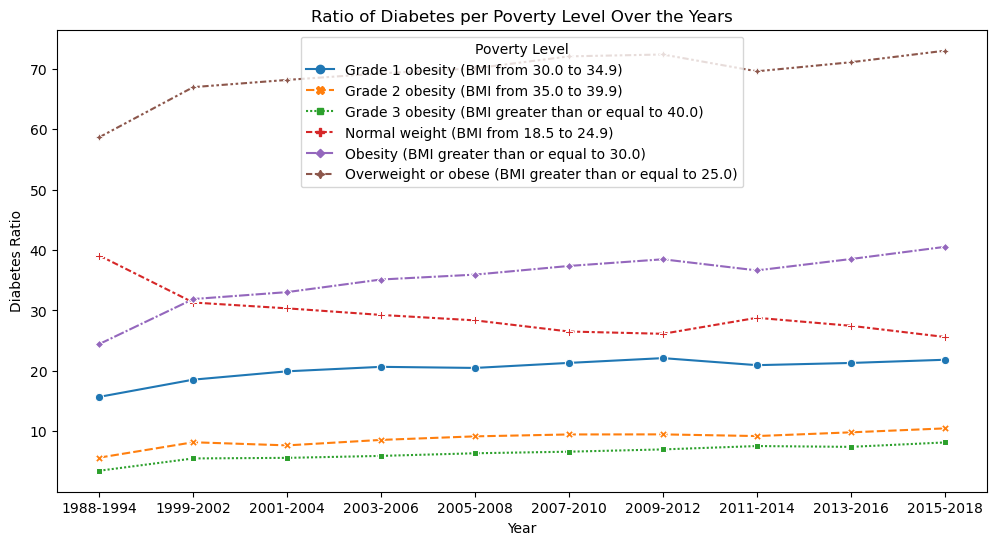

In [10]:

required_columns = ['YEAR', 'PANEL', 'ESTIMATE']
for col in required_columns:
    if col not in df4.columns:
        raise ValueError(f"Missing required column: {col}")

# Group by YEAR and PANEL (poverty level), and calculate the mean estimate (assuming ESTIMATE is the diabetes ratio)
diabetes_ratio = df4.groupby(['YEAR', 'PANEL'])['ESTIMATE'].mean().reset_index()

# Pivot the DataFrame to have years as rows and poverty levels as columns for easier plotting
pivot_table = diabetes_ratio.pivot(index='YEAR', columns='PANEL', values='ESTIMATE')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title('Ratio of Diabetes per Poverty Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Diabetes Ratio')
plt.legend(title='Poverty Level')
plt.show()

In [11]:
filtered_dataset = df4[df4['STUB_NAME'] == 'Total']


In [12]:
filtered_dataset = df5[df5['STUB_NAME'].isin(['Percent of poverty level'])]


In [13]:
filtered_recent = df5[df5['YEAR_NUM'] == 10] 


In [14]:
filtered_recent_genders = filtered_recent[
    (filtered_recent['STUB_LABEL'].isin(['Male', 'Female'])) | 
    (filtered_recent['STUB_NAME'] == 'Percent of poverty level')]


In [15]:
selected_col = ['INDICATOR', 'AGE', 'STUB_LABEL', 'ESTIMATE']
filtered_df = filtered_recent_genders[selected_col]


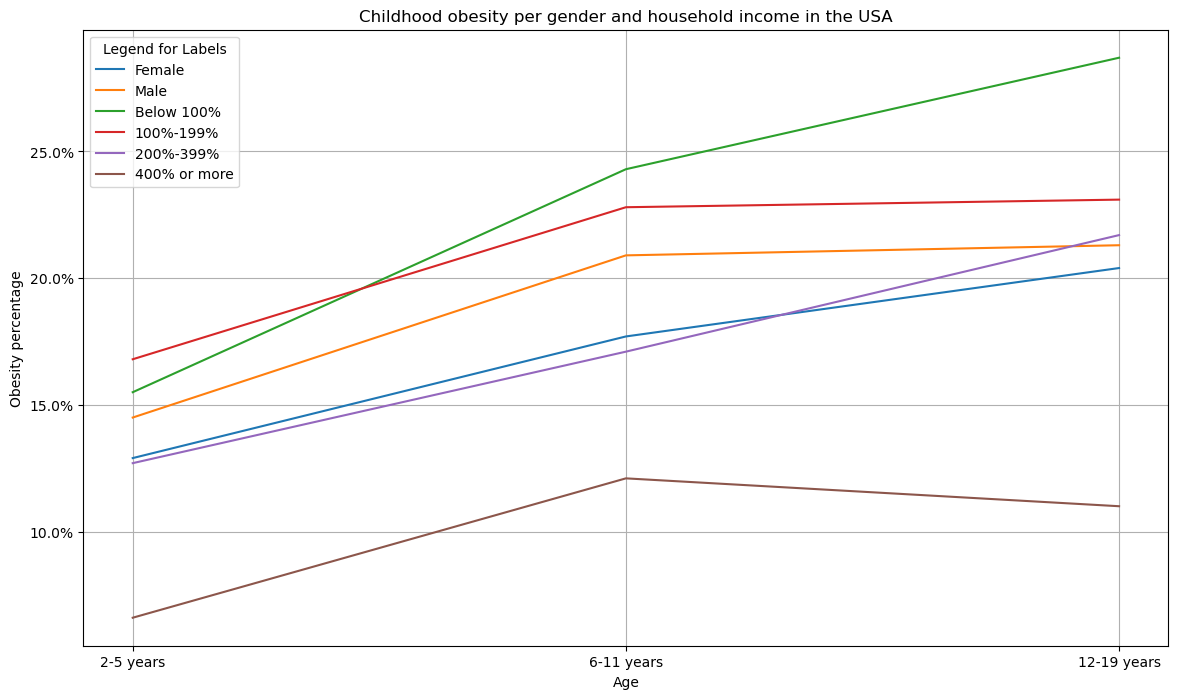

In [16]:
from matplotlib.ticker import PercentFormatter
filtered_df_2 = filtered_df[filtered_df['AGE'] != '2-19 years']

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df_2, x='AGE', y='ESTIMATE', hue='STUB_LABEL', markers=True, dashes=False)

plt.title('Childhood obesity per gender and household income in the USA')
plt.xlabel('Age')
plt.ylabel('Obesity percentage')
plt.legend(title='Legend for Labels')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()


## Perspectief 1

### Mensen met een lager inkomen hebben minder toegang tot gezonde voeding doordat gezonde voeding duurder is. 

In [58]:
try:
    df7 = pd.read_csv("faps_access_puf.csv", encoding='latin-1')
    df8 = pd.read_csv("faps_fahitem_puf.csv", encoding='latin-1')
    df9 = pd.read_csv("faps_fafhitem_puf.csv", encoding='latin-1')
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
df7.head(2)


,hhnum,infousa_flag,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,ss1,ss2,ss3,ss4,ss5,ss6,ss7,ss8,sm1,sm2,sm3,sm4,sm5,sm6,sm7,sm8,co1,co2,co3,co4,co5,co6,co7,co8,cs1,cs2,cs3,cs4,cs5,cs6,cs7,cs8,mlg1,mlg2,mlg3,mlg4,mlg5,mlg6,mlg7,mlg8,dist_ss,dist_sm,dist_co,dist_cs,dist_mlg,dist_walmart,nearsnap_placeid,nearsnap_stype,nearsnap_dist,nearsmss_placeid,nearsmss_stype,nearsmss_dist,ff1,ff2,ff3,ff4,ff5,ff6,ff7,ff8,nonff1,nonff2,nonff3,nonff4,nonff5,nonff6,nonff7,nonff8,nearff_sic1,nearff_sic2,nearff_dist,nearnonff_sic1,nearnonff_sic2,nearnonff_dist,nearmcd_sic1,nearmcd_sic2,nearmcd_dist
0,100012,1,0,4,9,16,19,22,37,188,0,0,1,2,2,2,3,13,0,1,1,1,1,1,1,14,0,1,5,5,7,8,14,67,0,0,0,4,5,7,12,62,0,2,2,3,3,3,6,11,0.90,0.33,0.34,1.03,0.33,0.9,1017721.0,SM,0.33,1017721.0,SM,0.33,0,1,10,11,12,12,14,77,0,4,15,21,26,26,36,222,581208,581206,0.30,581208,581208,0.3,581208,581206,0.527480
1,100015,1,1,6,18,43,52,80,118,512,0,0,1,2,2,3,5,21,0,0,0,3,5,6,9,41,0,1,4,12,14,20,27,141,0,3,10,15,17,30,43,182,0,0,0,3,3,7,10,36,0.94,1.05,0.32,0.26,1.16,1.7,NaN,ME,0.19,1160329.0,SS,0.94,1,1,2,15,16,22,28,39,2,4,16,35,43,60,75,113,581208,581206,0.21,581208,581208,0.2,581208,581206,1.546103


In [59]:
df8.head(2)

,hhnum,eventid,itemnum,itemdesc,itemdescsource,itemdesc_flag,barcode,barcodesource,upcreceiptmatch,iri,barcode_original,itemreportmethod,itemassignmethod,totgramsunadj,totgramsunadjimp,pkgsize,pkgsizeunit,fluidozgrams,eggsize,quantity,varwgtlbs,varwgtcount,pkgwtsource,totitemexp,totitemexpnocoupons,totstoresavings,coupons,totitemexp_flag,free,imputedexp,imputedvalue,imputemethod,scandate_flag
0,100012,65792,1,NaN,1,0,051933267503,1,NaN,1,.V,1,2,340.2,NaN,12.0,OZ,NaN,NaN,1,NaN,NaN,1.0,0.89,0.89,0.0,0.0,0,0.0,-996.0,-996.0,-996,0
1,100012,65792,2,NaN,1,0,051933161825,1,NaN,3,.V,1,2,NaN,NaN,NaN,NaN,30.7,NaN,1,NaN,NaN,NaN,0.79,0.79,0.0,0.0,0,0.0,-996.0,-996.0,-996,0


In [60]:
df9.head(2)

,hhnum,eventid,itemnum,bundlenum,bundletype,menugrp,nonschmealitem,itemdesc,itemdescsource,quantity,quantity_flag,size,size_flag,sizeunit,sizeunit_flag,sizerelative,gramstotal,additem_flag,itemcost,itemcost_flag,totitemcost,free,free_flag2,impitemcost,impcostmethod,imptotcost
0,100012,65766,1,NaN,NaN,TOP,-996.0,Double Cheeseburger,7,1.0,0,NaN,0,NaN,0,NaN,165.0,0,0.0,0,0.0,1,0,NaN,-996,NaN
1,100012,65767,1,NaN,NaN,BEV,-996.0,"REGULAR SODA, SPRITE, SIERRA MIST, MOUNTAIN DEW",5,3.0,0,12.0,0,OZ,1,NaN,1108.8,0,0.5,0,1.5,0,0,NaN,-996,NaN


#### which macronutriens are unhealty?

Fats:

Fats consist of 3 main types; saturated fats, which can usually be found in dairy products, monounsaturated fats which can be found in nuts, seeds and oils, and polyunsaturated fats, which can be found in falxseeds, walnuts and fish. 

Since saturated fats take less time to be stored or processed due to their relative simplicity and their tendency to raise LDL cholesterol (low-density lipoprotein), which can increase the risk of cardiovascular disease by clogging the arteries, they are generally regarded as the worst kind of fat.

Less than 5-6% of daily calorie intake should be saturated fat which is about 11-13 grams a day if you account for a 2000 kcal diet, so about 120 kcal. https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/fats/saturated-fats


Carbohydrates:

Carbs consist of 3 main types; Sugars, Starches and Fibers. 

Sugars are incomplex carbohydrates such as mono- and disaccharides which can be easily converted into glucose (which is a monosaccharid) and can then either be converted into fat for storage or be consumed for energy, an acces causes insulin to be released in the pancreas and convert these monosaccharides into fats. 

Starches are longer chains of saccharides, they can be found in starchy foods such as beans and potatoes, these polysaccharides take longer to be converted into glucose so they provide sugars in a slower tempo and keep you filled for quite some time. So they are regarded as a healthy carbs.

Fibers promote gut health and are not digested because they are too complex. animals with multiple stomachs such as cows do eat these as a source of carbs.

Generally people shouldn't consume more than 30 grams or about 125 kcal of monosaccharides per day.

https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/sugar/how-much-sugar-is-too-much
https://www.ncbi.nlm.nih.gov/books/NBK459280/


We will use these macronutriens to measure if a certain food is healthy or not. If a fooditem has more than 1/2 of the daily recommended intake of either sugars or saturated fat, or if the total amount of carbs per fooditem consists of more than 11.5% sugar it will be regarded as unhealthy. Fatty food will be regarded unhealthy if more than 19.5% of the total fat is saturated fat.

Since some foods have low amounts of sugar and fats but they are of the unhealthy kind, such as onions which have 0.042 grams of saturated fat we'll add a minimum weight percentage of 30% fat or sugar.

This data is gathered from SNAP households, SNAP is a welfare program in the US for people with low incomes.

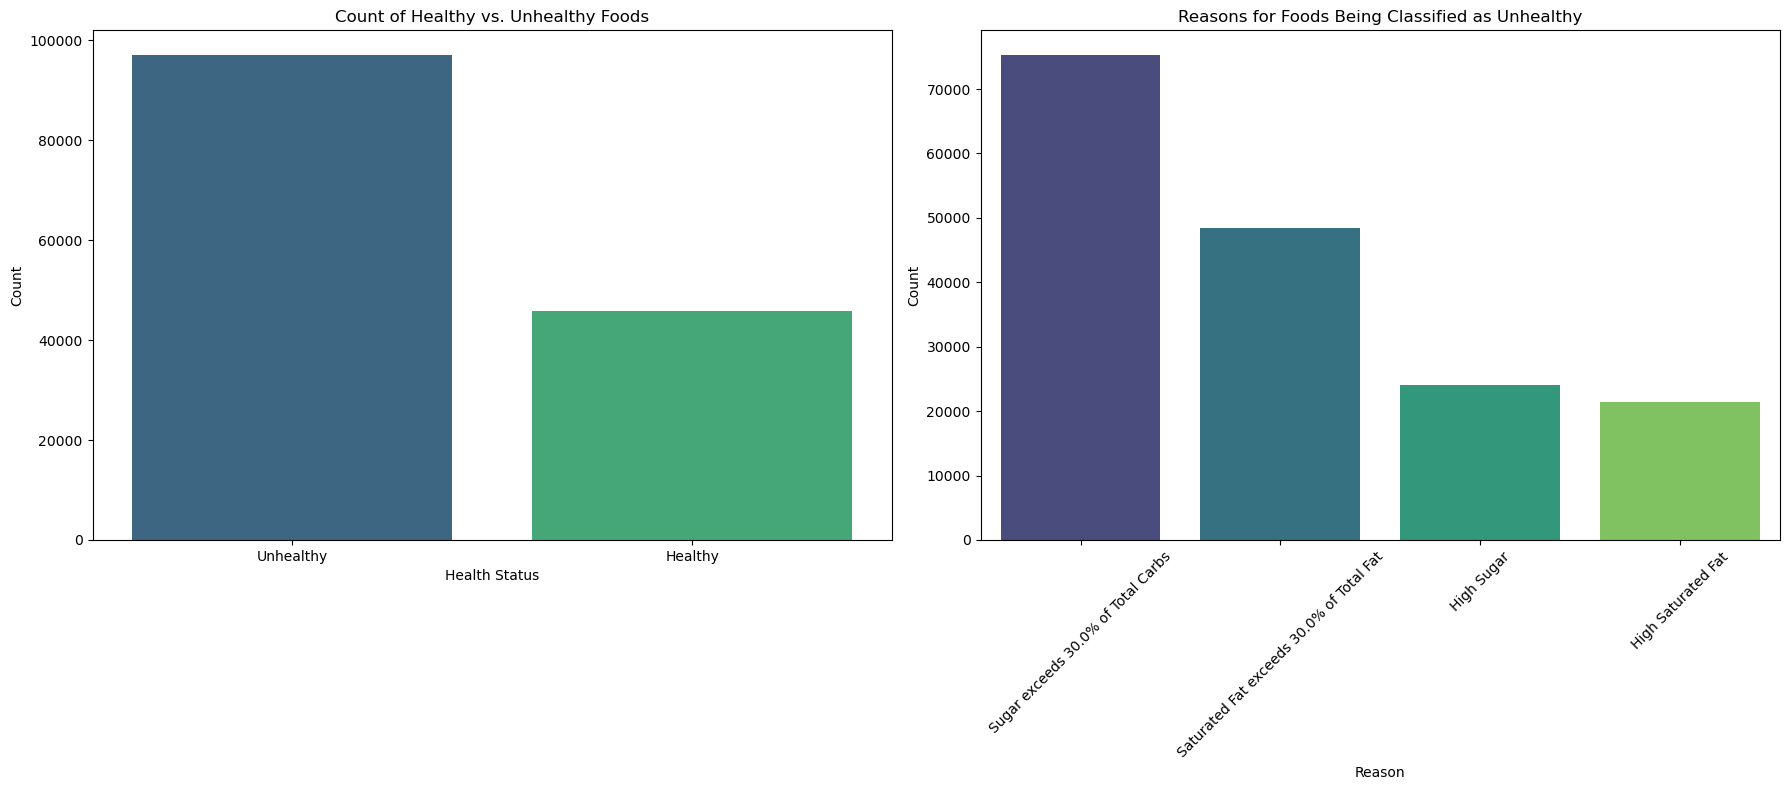

In [79]:
df10 = pd.read_csv("fah_nutrients_c.csv")

daily_sugar_limit = 30  # grams
daily_satfat_limit = 13  # grams
daily_calories = 2000  # kcal

sugar_threshold = daily_sugar_limit / 2
satfat_threshold = daily_satfat_limit / 2
carb_sugar_percentage_threshold = 11.5 / 100
fat_satfat_percentage_threshold = 42 / 100
min_satfat_percentage_of_total = 30 / 100  # Minimum weight percentage of total fat
min_sugar_percentage_of_total = 30 / 100  # Minimum weight percentage of total carbs

# Function to classify foods
def classify_food(row):
    reasons = []
    
    if row['totsug'] > sugar_threshold:
        reasons.append('High Sugar')
        
    # Calculate the percentage of sugar relative to total carbohydrates
    if row['carb'] != 0:
        sugar_percentage = (row['totsug'] / row['carb']) * 100
    else:
        sugar_percentage = 0
    
    # Check if the percentage of sugar exceeds the minimum threshold
    if sugar_percentage > min_sugar_percentage_of_total * 100:
        reasons.append(f'Sugar exceeds {min_sugar_percentage_of_total * 100}% of Total Carbs')
        
    if row['satfat'] > satfat_threshold:
        reasons.append('High Saturated Fat')
        
    # Calculate the percentage of saturated fat relative to total fat
    if row['totfat'] != 0:
        satfat_percentage = (row['satfat'] / row['totfat']) * 100
    else:
        satfat_percentage = 0
    
    # Check if the percentage of saturated fat exceeds the minimum threshold
    if satfat_percentage > min_satfat_percentage_of_total * 100:
        reasons.append(f'Saturated Fat exceeds {min_satfat_percentage_of_total * 100}% of Total Fat')
    
    if reasons:
        return 'Unhealthy', reasons
    else:
        return 'Healthy', []

# Apply classification to the dataframe
df10['Health_Status'], df10['Reasons'] = zip(*df10.apply(classify_food, axis=1))

# Count the healthy and unhealthy foods
health_counts = df10['Health_Status'].value_counts()

# Plotting subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Count of Healthy vs. Unhealthy Foods
sns.barplot(x=health_counts.index, y=health_counts.values, palette='viridis', ax=axs[0])
axs[0].set_title('Count of Healthy vs. Unhealthy Foods')
axs[0].set_xlabel('Health Status')
axs[0].set_ylabel('Count')

# Plot 2: Reasons for Foods Being Classified as Unhealthy
unhealthy_reasons = df10[df10['Health_Status'] == 'Unhealthy']['Reasons'].explode().value_counts()
sns.barplot(x=unhealthy_reasons.index, y=unhealthy_reasons.values, palette='viridis', ax=axs[1])
axs[1].set_title('Reasons for Foods Being Classified as Unhealthy')
axs[1].set_xlabel('Reason')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Mensen met een lager inkomen doen minder vaak aan sport buiten werk

In [38]:
df6 = pd.read_csv('diabetes_split.csv')
df6.head(5)

,Diabetes_binary,BMI,Smoker,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,26.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,30.0,1.0,4.0,6.0,8.0
1,0.0,26.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,12.0,6.0,8.0
2,0.0,26.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,1.0,13.0,6.0,8.0
3,0.0,28.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,1.0,11.0,6.0,8.0
4,0.0,29.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0


In [1]:
df6['PhysActivity'] = df6['PhysActivity'].astype(int)

# Map the values to their respective labels
df6['PhysActivity'] = df6['PhysActivity'].map({0: 'No Physical Activity', 1: 'Physical Activity'})

# Fill NaN values in PhysActivity column with a placeholder (if any)
df6['PhysActivity'] = df6['PhysActivity'].fillna('Unknown')

# Filter DataFrame for PhysActivity == 'Physical Activity' (1) and PhysActivity == 'No Physical Activity' (0)
df_active = df6[df6['PhysActivity'] == 'Physical Activity']
df_inactive = df6[df6['PhysActivity'] == 'No Physical Activity']

# Calculate proportions within the DataFrame for each subset
df_active['Proportion'] = df_active.groupby(['Age', 'Income'])['PhysActivity'].transform('size') / len(df_active)
df_inactive['Proportion'] = df_inactive.groupby(['Age', 'Income'])['PhysActivity'].transform('size') / len(df_inactive)

# Create Bubble Plot for Physical Activity
fig1 = px.scatter(
    df_active,
    x='Age',
    y='Income',
    size='Proportion',
    color='PhysActivity',
    hover_name='PhysActivity',
    size_max=30,
    title='Bubble Plot: Income by Age and Physical Activity (Physical Activity)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Proportion': 'Proportion of Total Values',
        'PhysActivity': 'Physical Activity'
    },
    template='plotly_white'
)

fig1.update_layout(
    xaxis=dict(
        title='Age',
        tickvals=list(range(1, 14)),
        ticktext=list(range(1, 14))
    ),
    yaxis=dict(
        title='Income',
        tickvals=list(range(1, 9)),
        ticktext=list(range(1, 9))
    ),
    height=600
)

# Create Bubble Plot for No Physical Activity
fig2 = px.scatter(
    df_inactive,
    x='Age',
    y='Income',
    size='Proportion',
    color='PhysActivity',
    hover_name='PhysActivity',
    size_max=30,
    title='Bubble Plot: Income by Age and Physical Activity (No Physical Activity)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Proportion': 'Proportion of Total Values',
        'PhysActivity': 'Physical Activity'
    },
    template='plotly_white'
)

fig2.update_layout(
    xaxis=dict(
        title='Age',
        tickvals=list(range(1, 14)),
        ticktext=list(range(1, 14))
    ),
    yaxis=dict(
        title='Income',
        tickvals=list(range(1, 9)),
        ticktext=list(range(1, 9))
    ),
    height=600
)

# Show the figures
fig1.show()
fig2.show()

NameError: name 'df6' is not defined

## Reflection
Van onze TA en medestudenten uit groep M kregen we feedback op onze draft tijdens een werkcollege 2 weken geleden. Wij presenteerden eerst ons werk, en kregen vervolgens feedback op de layout, visualisaties en argumenten. Hieronder staan de tips en feedback die wij hebben gekregen en ook gebruikt bij het schrijven van onze eindversie van de datastory:

-De layout en het lettertype aanpassen om de datastory visueel prettig te maken.
-Meer tekst schrijven bij de visualisaties.
-

Verder hebben we nagedacht over xxxxxx


## References